<h1>Obesity Data</h1>


<h3>Introduction</h3>
As a zombie, one of the most important factors of survival is finding food. Rarely are zombies depicted as having interests other than the consumption of humans. Such depictions are found in many zombie movies, tv shows, and books. With this in mind, we analyzed areas where the zombies could have the highest quantity of food to consume per human. Areas with high obesity rates would provide the most food to consume per hunt; therefore, we decided to analyze obesity rates per neighborhood in Pittsburgh. In analyzing obesity data in Pittsburgh, we can ultimately determine which areas a zombie should target to consume the best food source.

<h3>The Metric</h3>
The metric studied is obesity rates in Pittsburgh. Using the obesity data from <a href="https://data.wprdc.org/dataset/allegheny-county-obesity-rates">https://data.wprdc.org/dataset/allegheny-county-obesity-rates</a>, the area with the highest obesity rate. In order to determine the metric for best food source, we considered amount of food, quality of food, and availability of food. Ultimately, we determined that quantity of food and availability of food would be most important to analyze. Analyzing quantity of food would also allow for higher survivability. Areas with high obesity rates would provide a larger quantity of food for zombies to consume. The obesity dataset chosen included data from most neighborhoods in Pittsburgh as well as data from surrounding municipalities. However, the dataset had some limitations to consider. One limitation of the dataset was that the rates were only estimates of obesity rates. In addition, the dataset was fairly old, estimating rates from 2006-2010, meaning the information was not as accurate today. Also, the dataset did not include every neighborhood in Pittsburgh which meant it did not give a complete idea of the obesity rates in all of Pittsburgh. Despite the limitations, the dataset contained sufficient data to create a fairly accurate depiction of the best neighborhood for a zombie by obesity rates.

<h3>Analyzing Obesity Data</h3>
In order to determine the areas with the highest obesity rates, the obesity data needed to be displayed in order from highest obesity rates to lowest obesity rates. To do so, I had to sort the data by obesity rates. However, some neighborhoods were displayed multiple times with different obesity rates. In order to deal with them, I grouped the rates by neighborhood and found the mean of the obesity rates that appeared multiple times.

In [73]:
# load pandas and geopandas
import pandas as pd
import geopandas as gpd

# load obesity data and map data
obesity_data_pandas = pd.read_csv("obesity-ac-2006-2010censustracts.csv", index_col="stname")
obesity_data_pandas

,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
stname,,,,,,,
Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
...,...,...,...,...,...,...,...
Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386
Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375
Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487


In [74]:
# filter obesity rates by neighborhood and find the average of repeated neighborhoods,
obesity_rates_by_neighborhood = obesity_data_pandas.groupby('City Neighborhood').mean()['2006-2010 estimate of obesity']

# sort obesity rates from highest to lowest rate and display
obesity_rates_by_neighborhood.sort_values(ascending=False).reset_index().head(20)

,City Neighborhood,2006-2010 estimate of obesity
0,Northview Heights,0.922932
1,Fairywood,0.820311
2,California Kirkbride,0.771046
3,Saint Clair,0.699500
4,Terrace Village,0.674103
5,Central Business District,0.668012
6,Bedford Dwellings,0.636222
7,Homewood South,0.609697
8,Middle Hill,0.608099
9,Homewood North,0.596425


<h3>Displaying Obesity Data</h3>

After determining the areas with the greatest obesity rates, I wanted to display a map that showed obesity rates in each area of Pittsburgh. Using a Pittsburgh neighborhoods shape file from https://data.wprdc.org/dataset/neighborhoods2, I imported the data using geopandas and merged the neighborhood shape data with the obesity rates data. After, I plotted the information using geopandas to display the map.

In [75]:
# read shapefiles
neighborhoods = gpd.read_file('Neighborhoods/Neighborhoods_.shp')

# merge neighborhood obesity data with neighborhood map
neighborhoods_map = neighborhoods.merge(obesity_rates_by_neighborhood, how='left', left_on='hood', 
                                        right_on='City Neighborhood')

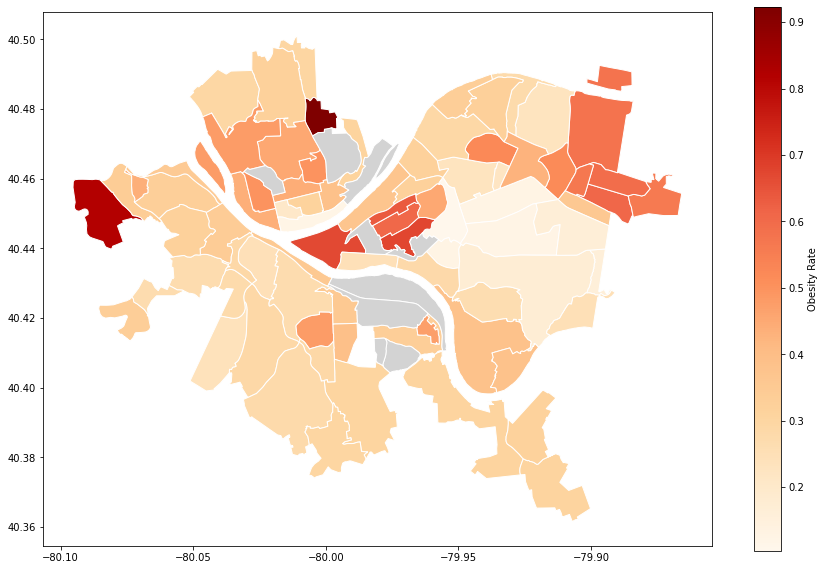

In [76]:
# draw colored map of neighborhoods with obesity rate
neighborhoods_map.plot(column='2006-2010 estimate of obesity', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor='white',        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': 'Obesity Rate'}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={'color': 'lightgrey'} # set disctricts with no data to gray
               )

<h3>The Best Neighborhood</h3>
After analyzing the obesity dataset, I determined that the best neighborhood in Pittsburgh is Northview Heights. With an estimated obesity rate of 0.922, the neighborhood is primarily made up of people who are obese. If a zombie were hunting in the area, the zombie would have a greater amount to consumer per human hunted. Therefore, Northview Heights would have the greatest quantity of food per human consumed and be considered the best neighborhood in Pittsburgh by the metric.
<h3>Conclusion</h3>
Though I had concluded that the best neighborhood was Northview Heights according to the obesity data, the neighborhood that we ultimately decided was the best was the Central Business District. When we combined our data, the obesity rates differed from the walk score and the population density. In order to determine what the best neighborhood would be, we had to find the neighborhood that had the greatest score in all three factors. While Northview Heights might have had the greatest rate of people who are considered obese, the neighborhood's population and population density was not high enough for a zombie to have the greatest chance of survival. The neighborhood would also not be ideal for a zombie to move around in to hunt for food as the walkability would not have been ideal. After ranking all the neighborhoods and finding the neighborhood that had the best score on average, we determined that the best neighborhood in Pittsburgh overall was the Central Business District.